Runs:
run1_100_1 
3503c85c6c09414c9daecad84fd466de

runt2_200_1 
b3b5016356324efa8bcbe0c3e00462a5

cmplx_1_400_200 
7cc54298176a408ba773155bd62f8cb8

cmplx_3_400_2 
630dc8f6443a4858be3e022cef51f2ce

param_run2_f2 
95dfe4f38c2a4e55abce2ec7f5b212b5

In [66]:
import mlflow as ml
import numpy as np
ml.set_tracking_uri("../mlruns")
import pandas as pd

In [5]:
exp_param = ml.get_experiment_by_name("param_eval1")
exp_param

<Experiment: artifact_location='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/286845418117162243', creation_time=1712600765325, experiment_id='286845418117162243', last_update_time=1712600765325, lifecycle_stage='active', name='param_eval1', tags={}>

In [16]:
run = ml.get_run("95dfe4f38c2a4e55abce2ec7f5b212b5")
run.info.artifact_uri

'/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/286845418117162243/95dfe4f38c2a4e55abce2ec7f5b212b5/artifacts'

In [64]:
artf = ml.artifacts.list_artifacts(run_id="95dfe4f38c2a4e55abce2ec7f5b212b5")
artf_uri = ml.get_artifact_uri("95dfe4f38c2a4e55abce2ec7f5b212b5")
# artf_uri

In [65]:
x = [i.path for i in artf]
# np.array(x)


In [17]:
ml.artifacts.load_dict(artifact_uri=run.info.artifact_uri+ "/iters.json")

{'iters': 1}

In [103]:
def get_all_artf(run_id, name = None, keyword = None):
	if name is None:
		name = keyword
	runinfo  = ml.get_run(run_id)
	print(runinfo)
	art_uri = runinfo.info.artifact_uri
	art_lst = ml.artifacts.list_artifacts(run_id=run_id)
	art_nms = [i.path for i in art_lst]
	out_dct = {}
	for n in art_nms:
		if ".json" in n:
		# print(n)
			if name is None:
				# print(n)
				val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
				out_dct[n] = val
			else:
				if name in n:
					val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
					out_dct[n] = val
	return out_dct


In [123]:
# vis 1
v1 = get_all_artf("3503c85c6c09414c9daecad84fd466de")
v1 = pd.DataFrame(v1).T
v1 = v1.reset_index(names="names")

v2 = v1[~v1["rmse"].isna()]
v2_k = v2[v2["names"].str.contains("k")]
v2_k

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'run1_100_1',
 'mlflow.source.git.commit': 'ce9c10cc3382186470ac362f0ececea7717a864a',
 'mlflow.source.name': 'simple_12.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/456088235245605733/3503c85c6c09414c9daecad84fd466de/artifacts', end_time=1710134945837, experiment_id='456088235245605733', lifecycle_stage='active', run_id='3503c85c6c09414c9daecad84fd466de', run_name='run1_100_1', run_uuid='3503c85c6c09414c9daecad84fd466de', start_time=1710098105082, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


,names,cens_retrieved,rmse,bias,cov,ivl,trees,split_rules,N,seeds,type,x_vars,VAR_CLASS,VAR_PROB,scale_f,shape_f,cens_scale,iters,seed_addl,time
1,1_1_200_met_k.json,NaN,"[0.018821506487716303, 0.032882817116890374, 0...","[-0.00034872118826489887, -0.00661235555378879...","[0.92, 0.96, 0.96, 0.98, 0.98]","[0.07495498074680594, 0.1298533441759659, 0.14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1_1_400_met_k.json,NaN,"[0.012807164923526036, 0.025473982765638836, 0...","[-0.0015737211882647184, -0.007122378653290962...","[0.96, 0.93, 0.92, 0.97, 0.96]","[0.051999343851527706, 0.09190218220337865, 0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1_2_200_met_k.json,NaN,"[0.020453930538409902, 0.04469080111423916, 0....","[-0.010448721188264882, -0.026169485987741777,...","[0.93, 0.94, 0.95, 0.96, 0.96]","[0.07055055627692228, 0.14339003259799113, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1_2_400_met_k.json,NaN,"[0.016903700110944827, 0.03963564388593965, 0....","[-0.011698721188264805, -0.027324732125826326,...","[0.92, 0.78, 0.83, 0.86, 0.89]","[0.04870994965915599, 0.10137159267606938, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2_1_200_met_k.json,NaN,"[0.027722091478916546, 0.04636019063645374, 0....","[-0.0022718687808548402, -0.006355721403089523...","[0.955, 0.96, 0.955, 0.935, 0.945]","[0.12270438246977652, 0.17664584153690627, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2_1_400_met_k.json,NaN,"[0.020853145964683954, 0.03308023303938258, 0....","[-0.004135797927392582, -0.006360601851071518,...","[0.955, 0.96, 0.955, 0.945, 0.925]","[0.08407176427541575, 0.12456213250336108, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2_2_200_met_k.json,NaN,"[0.02777674088056081, 0.05282444787979049, 0.0...","[-0.009252545109357224, -0.020957439077022234,...","[0.975, 0.945, 0.955, 0.87, 0.8200000000000001]","[0.11967408708477523, 0.18638841142228668, 0.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2_2_400_met_k.json,NaN,"[0.022745579239021155, 0.04165316675289575, 0....","[-0.011629759280049614, -0.024027735218014365,...","[0.95, 0.91, 0.87, 0.8200000000000001, 0.765]","[0.08156454858127418, 0.13122374546444665, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
all = get_all_artf("95dfe4f38c2a4e55abce2ec7f5b212b5", keyword="stats.")

In [254]:
pd_prm = pd.DataFrame(all).T
# pd_prm["name"] = pd_prm.index
pd_prm = pd_prm.reset_index(names = "name")
pd_prm["tune"] = pd_prm["name"].str.split("_").str[2]
pd_prm["draw"] = pd_prm["name"].str.split("_").str[4]
pd_prm["tree"] = pd_prm["name"].str.split("_").str[6]
pd_prm["n"] = pd_prm["name"].str.split("_").str[7]


# pd_prm

In [239]:
# for i in pd_prm["cov_ci"]:
	# x = np.array(i)
# x
# x = pd_prm["cov_ci"].to_numpy()
# print(np.stack(pd_prm["cov_ci"].values))
cov_ci = np.stack(pd_prm["cov_ci"].values).reshape(-1,7)
cov_hdi = np.stack(pd_prm["cov_hdi"].values).reshape(-1,7)
iv_ci = np.stack(pd_prm["iv_ci"].values).reshape(-1,7)
iv_hdi = np.stack(pd_prm["iv_hdi"].values).reshape(-1,7)
rmse = np.stack(pd_prm["rmse"].values).reshape(-1,7)
bias = np.stack(pd_prm["bias"].values).reshape(-1,7)
tune = pd_prm["tune"].values
draw = pd_prm["draw"].values
tree = pd_prm["tree"].values
names = pd_prm["name"].values


In [211]:
print(iv_ci[:,5])
print(iv_hdi[:,5])

[0.13450517 0.14657557 0.13954601 0.13062639 0.13387705 0.15056648
 0.12570573 0.12804789 0.1231612  0.14633828 0.13519924 0.11837634
 0.16218611 0.18392529 0.18306183 0.16955162 0.1722686  0.18677956
 0.21051997 0.17875592 0.1675725  0.18752237 0.17642843 0.1698258 ]
[0.13001112 0.14069226 0.1343084  0.12629021 0.1295964  0.14458821
 0.12126558 0.12404809 0.11902032 0.14010002 0.12976875 0.11449389
 0.1548863  0.17329263 0.17360672 0.16135876 0.16412978 0.17606904
 0.19855851 0.16999884 0.15891527 0.17623052 0.16666294 0.16128258]


In [176]:
import matplotlib.pyplot as plt

In [180]:
names

array(['prm_tune_1000_draw_1000_trees_100_1000_stats.json',
       'prm_tune_1000_draw_1000_trees_200_1000_stats.json',
       'prm_tune_1000_draw_1000_trees_20_1000_stats.json',
       'prm_tune_1000_draw_1000_trees_50_1000_stats.json',
       'prm_tune_1000_draw_2000_trees_100_1000_stats.json',
       'prm_tune_1000_draw_2000_trees_200_1000_stats.json',
       'prm_tune_1000_draw_2000_trees_20_1000_stats.json',
       'prm_tune_1000_draw_2000_trees_50_1000_stats.json',
       'prm_tune_1000_draw_500_trees_100_1000_stats.json',
       'prm_tune_1000_draw_500_trees_200_1000_stats.json',
       'prm_tune_1000_draw_500_trees_20_1000_stats.json',
       'prm_tune_1000_draw_500_trees_50_1000_stats.json',
       'prm_tune_100_draw_1000_trees_100_1000_stats.json',
       'prm_tune_100_draw_1000_trees_200_1000_stats.json',
       'prm_tune_100_draw_1000_trees_20_1000_stats.json',
       'prm_tune_100_draw_1000_trees_50_1000_stats.json',
       'prm_tune_100_draw_2000_trees_100_1000_stats.json

In [195]:
col = []
for d in draw:
	# print(d)
	if d == "500":
		col.append("blue")
	elif d == "1000":
		col.append("red")
	elif d == "2000":
		col.append("green")
col

# col = []
# for t in tree:
	# if t =

alpha = []
for t in tree:
	if t == "20":
		alpha.append(0.2)
	elif t == "50":
		alpha.append(0.4)
	elif t == "100":
		alpha.append(0.6)
	elif t == "200":
		alpha.append(0.8)

# for t in np.unique(tune):
	# for draw in np.unique(draw):
		# for tree in np.unique(tree):
			


In [214]:
lbls = "draw" + draw +"_" +"tree"+ tree

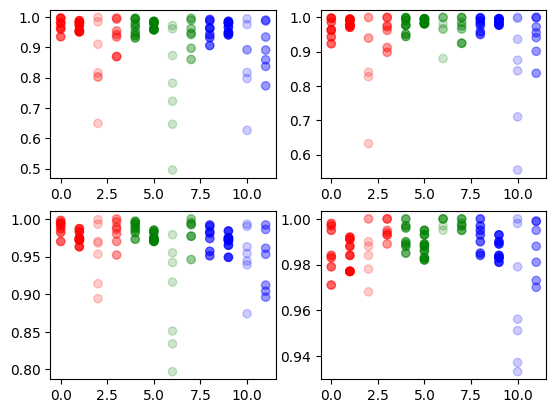

In [207]:
# for i in range(cov_ci.shape[1]):
fig, ax = plt.subplots(2,2)
for i in range(7):
	ax[0,0].scatter(np.arange(12), cov_ci[:12,i], color = col[:12], alpha = alpha[:12] )
	ax[0,1].scatter(np.arange(12), cov_ci[12:,i], color = col[12:], alpha = alpha[12:])
	ax[1,0].scatter(np.arange(12), cov_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
	ax[1,1].scatter(np.arange(12), cov_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend()
	# plt.plot(np.arange(cov_ci.shape[0]), cov_ci[:,2], "bo")

In [223]:
lbls

array(['draw1000_tree100', 'draw1000_tree200', 'draw1000_tree20',
       'draw1000_tree50', 'draw2000_tree100', 'draw2000_tree200',
       'draw2000_tree20', 'draw2000_tree50', 'draw500_tree100',
       'draw500_tree200', 'draw500_tree20', 'draw500_tree50',
       'draw1000_tree100', 'draw1000_tree200', 'draw1000_tree20',
       'draw1000_tree50', 'draw2000_tree100', 'draw2000_tree200',
       'draw2000_tree20', 'draw2000_tree50', 'draw500_tree100',
       'draw500_tree200', 'draw500_tree20', 'draw500_tree50'],
      dtype=object)

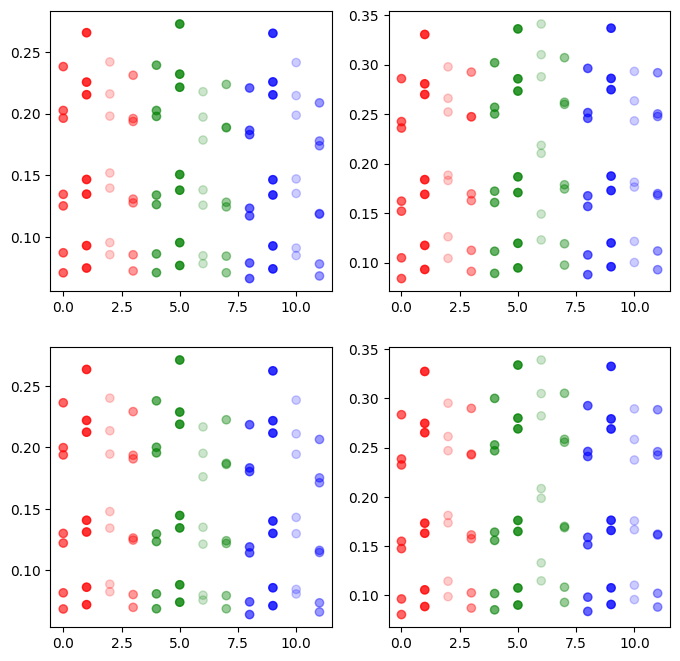

In [237]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
for i in range(7):
		ax[0,0].scatter(np.arange(12), iv_ci[:12,i], color = col[:12], alpha = alpha[:12])
		ax[0,1].scatter(np.arange(12), iv_ci[12:,i], color = col[12:], alpha = alpha[12:])
		ax[1,0].scatter(np.arange(12), iv_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
		ax[1,1].scatter(np.arange(12), iv_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend(lbls[:12])

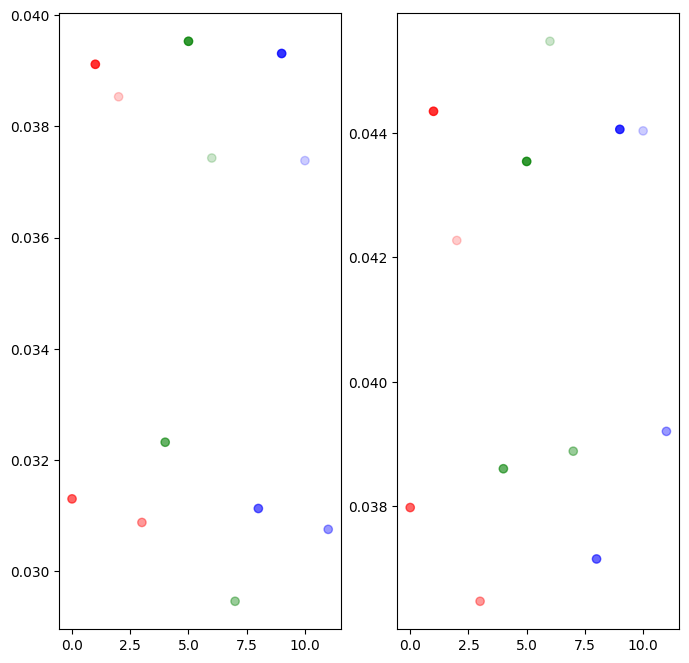

In [247]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
# for i in range(7):
		# ax[0].scatter(np.arange(12), rmse[:12,i], color = col[:12], alpha = alpha[:12])
		# ax[1].scatter(np.arange(12), rmse[12:,i], color = col[12:], alpha = alpha[12:])
		
ax[0].scatter(np.arange(12), rmse[:12,2:-2].mean(1), color = col[:12], alpha = alpha[:12])
ax[1].scatter(np.arange(12), rmse[12:,2:-2].mean(1), color = col[12:], alpha = alpha[12:])


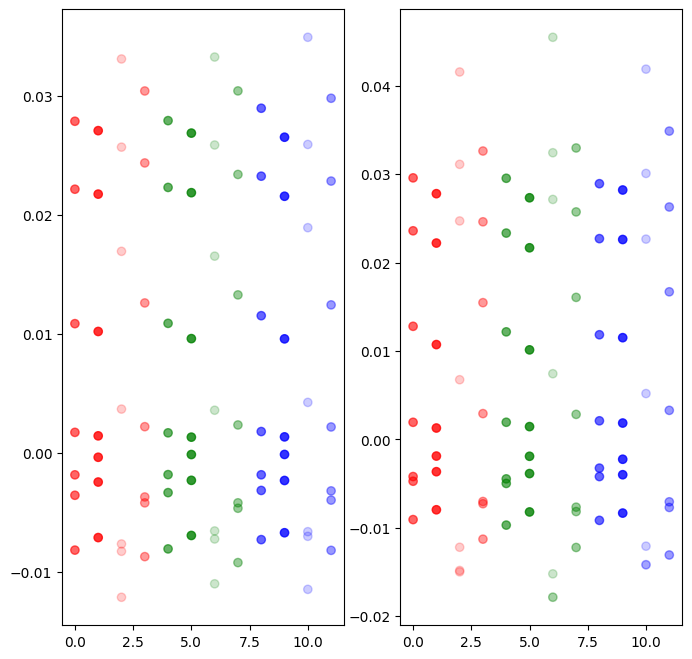

In [243]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
for i in range(7):
		ax[0].scatter(np.arange(12), bias[:12,i], color = col[:12], alpha = alpha[:12])
		ax[1].scatter(np.arange(12), bias[12:,i], color = col[12:], alpha = alpha[12:])
		# ax[1,0].scatter(np.arange(12), iv_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
		# ax[1,1].scatter(np.arange(12), iv_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend(lbls[:12])

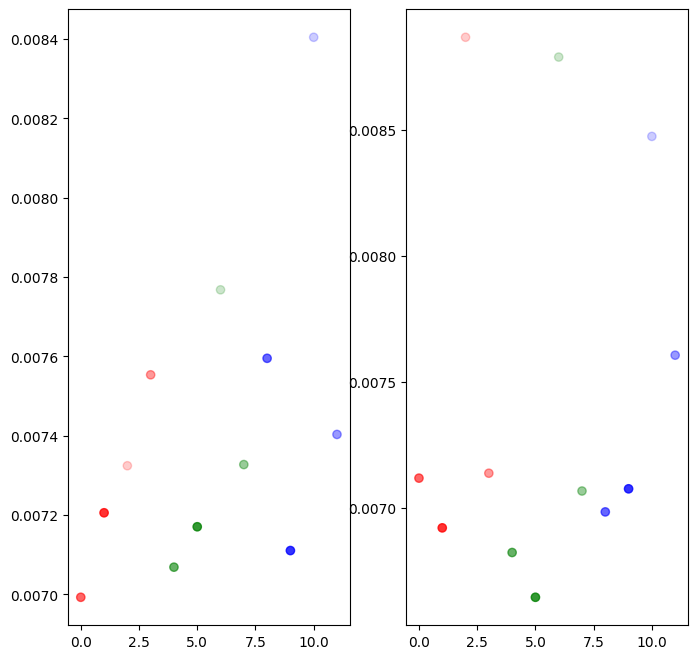

In [248]:
fig, ax = plt.subplots(1,2, figsize=(8,8))

ax[0].scatter(np.arange(12), bias[:12,:].mean(1), color = col[:12], alpha = alpha[:12])
ax[1].scatter(np.arange(12), bias[12:,:].mean(1), color = col[12:], alpha = alpha[12:])
		# ax[1,0].scatter(np.arange(12), iv_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
		# ax[1,1].scatter(np.arange(12), iv_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend(lbls[:12])

Looks like 100 tune, 500 draws *5 chains, 50 trees is sufficient

In [257]:
all = get_all_artf("95dfe4f38c2a4e55abce2ec7f5b212b5", keyword = "stats_tst")

pd_prm = pd.DataFrame(all).T
# pd_prm["name"] = pd_prm.index
pd_prm = pd_prm.reset_index(names = "name")
pd_prm["tune"] = pd_prm["name"].str.split("_").str[2]
pd_prm["draw"] = pd_prm["name"].str.split("_").str[4]
pd_prm["tree"] = pd_prm["name"].str.split("_").str[6]
pd_prm["n"] = pd_prm["name"].str.split("_").str[7]

cov_ci = np.stack(pd_prm["cov_ci"].values).reshape(-1,7)
cov_hdi = np.stack(pd_prm["cov_hdi"].values).reshape(-1,7)
iv_ci = np.stack(pd_prm["iv_ci"].values).reshape(-1,7)
iv_hdi = np.stack(pd_prm["iv_hdi"].values).reshape(-1,7)
rmse = np.stack(pd_prm["rmse"].values).reshape(-1,7)
bias = np.stack(pd_prm["bias"].values).reshape(-1,7)
tune = pd_prm["tune"].values
draw = pd_prm["draw"].values
tree = pd_prm["tree"].values
names = pd_prm["name"].values


<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'param_run2_f2',
 'mlflow.source.git.commit': '7b0ef780784ad3f167f0e808b2eb1ed0ff071678',
 'mlflow.source.name': 'param_1.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/286845418117162243/95dfe4f38c2a4e55abce2ec7f5b212b5/artifacts', end_time=1712698032884, experiment_id='286845418117162243', lifecycle_stage='active', run_id='95dfe4f38c2a4e55abce2ec7f5b212b5', run_name='param_run2_f2', run_uuid='95dfe4f38c2a4e55abce2ec7f5b212b5', start_time=1712683430619, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


In [259]:
col = []
for d in draw:
	# print(d)
	if d == "500":
		col.append("blue")
	elif d == "1000":
		col.append("red")
	elif d == "2000":
		col.append("green")
col

# col = []
# for t in tree:
	# if t =

alpha = []
for t in tree:
	if t == "20":
		alpha.append(0.2)
	elif t == "50":
		alpha.append(0.4)
	elif t == "100":
		alpha.append(0.6)
	elif t == "200":
		alpha.append(0.8)

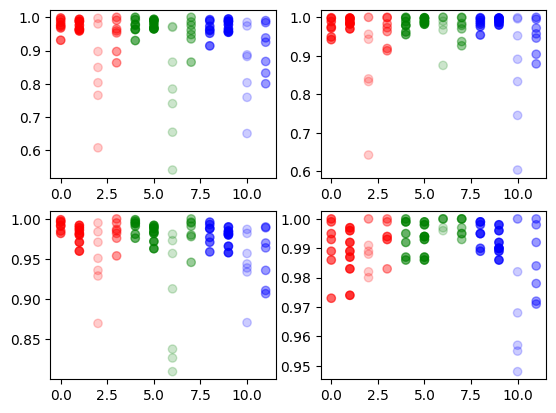

In [260]:
# for i in range(cov_ci.shape[1]):
fig, ax = plt.subplots(2,2)
for i in range(7):
	ax[0,0].scatter(np.arange(12), cov_ci[:12,i], color = col[:12], alpha = alpha[:12] )
	ax[0,1].scatter(np.arange(12), cov_ci[12:,i], color = col[12:], alpha = alpha[12:])
	ax[1,0].scatter(np.arange(12), cov_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
	ax[1,1].scatter(np.arange(12), cov_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend()

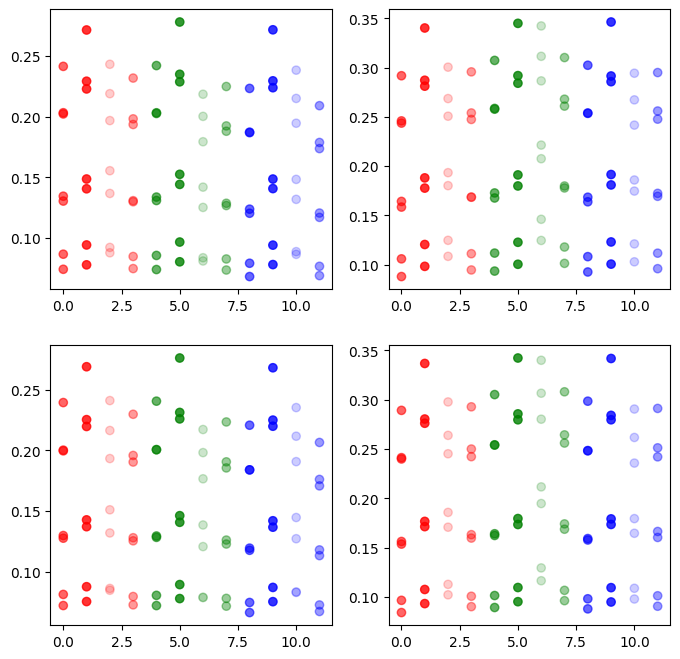

In [261]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
for i in range(7):
		ax[0,0].scatter(np.arange(12), iv_ci[:12,i], color = col[:12], alpha = alpha[:12])
		ax[0,1].scatter(np.arange(12), iv_ci[12:,i], color = col[12:], alpha = alpha[12:])
		ax[1,0].scatter(np.arange(12), iv_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
		ax[1,1].scatter(np.arange(12), iv_hdi[12:,i], color = col[12:], alpha = alpha[12:])
# fig.legend(lbls[:12])

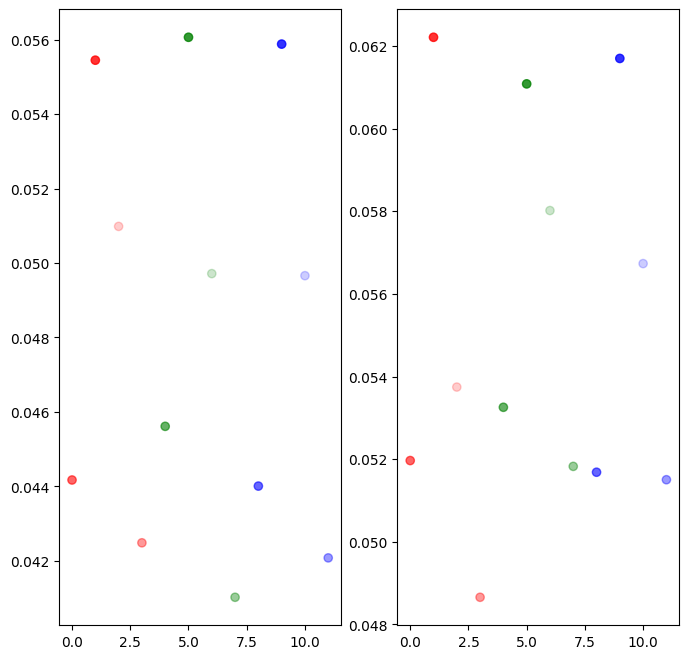

In [264]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
# for i in range(7):
		# ax[0].scatter(np.arange(12), rmse[:12,i], color = col[:12], alpha = alpha[:12])
		# ax[1].scatter(np.arange(12), rmse[12:,i], color = col[12:], alpha = alpha[12:])
		
ax[0].scatter(np.arange(12), rmse[:12,2:-2].mean(1), color = col[:12], alpha = alpha[:12])
ax[1].scatter(np.arange(12), rmse[12:,2:-2].mean(1), color = col[12:], alpha = alpha[12:])


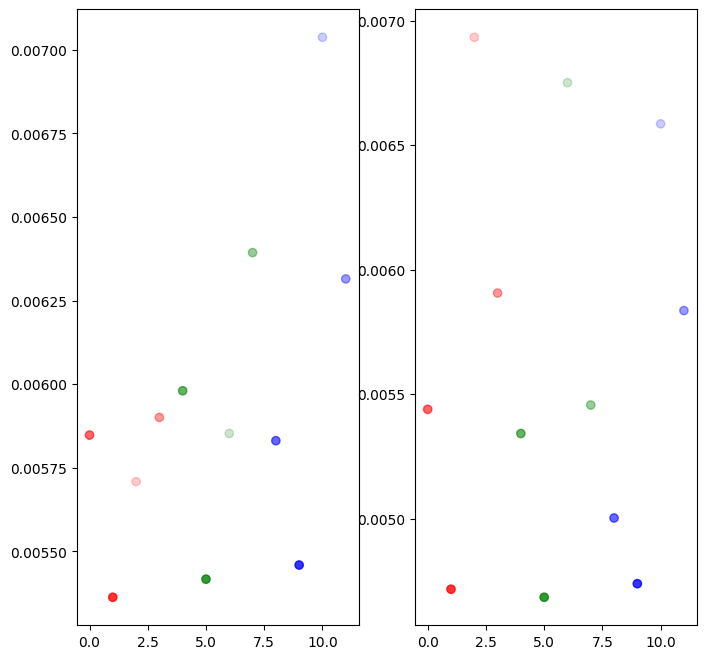

In [265]:
fig, ax = plt.subplots(1,2, figsize=(8,8))

ax[0].scatter(np.arange(12), bias[:12,:].mean(1), color = col[:12], alpha = alpha[:12])
ax[1].scatter(np.arange(12), bias[12:,:].mean(1), color = col[12:], alpha = alpha[12:])
		# ax[1,0].scatter(np.arange(12), iv_hdi[:12,i], color = col[:12], alpha = alpha[:12] )
		# ax[1,1].scatter(np.arange(12), iv_hdi[12:,i], color = col[12:], alpha = alpha[12:])
